In [12]:
#Takes a game by game season report and picks one stat in one situation type to graph win% in regards to the stat%
#All data comes from NaturalStatTrick.com

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

yearList = ['2017','2018','2019']
statList = ['CF%']#,'FF%','SF%','xGF%','SCF%','HDCF%','HDSF%','HDGF%','HDSH%','HDSV%','MDCF%','MDSF%','MDGF%','MDSH%','MDSV%','LDCF%','LDSF%','LDGF%','LDSH%','LDSV%','SH%','SV%','PDO']
sitList = ['All','5v5']

def cleanGame(game):
    game = game[13:]
    game = game.replace(' ','')
    game = game.split(',')
    return game

#Removes city from team name as to match with game section
def cleanTeam(team):
    team = team.rpartition(' ')[2]
    return team

#compare scores from the game section to determine the winner
def findWinner(game):
    score1 = game[0]
    score2 = game[1]
    if int(score1[-1:]) > int(score2[-1:]):
        return score1[:-1]
    else:
        return score2[:-1]
        
def checkWinner(game,team):
     return team in game  

    
for i in range(len(statList)):
    for j in range(len(yearList)):
        for k in range(len(sitList)):
            print('Year: '+yearList[j]+' Stat: '+statList[i]+' Sit: '+sitList[k])
#Pick a file
            year = yearList[j] #input("Year: ") #2017,2018,2019
            stat = statList[i] #input("Stat: ") #CF%,FF%,SF%,GF%,SCF%,HDCF%,HDSF%,HDGF%,HDSH%,HDSV%,MDCF%,MDSF%,MDGF%,MDSH%,MDSV%,LDCF%,LDSF%,LDGF%,LDSH%,LDSV%,SH%,SV%,PDO
            situation = sitList[k]#input("Situation: ") #5v5, all
            file = year + ' Full ' + situation +'.csv'

            fTable = pd.read_csv(file,sep=',')    #Full csv import to table
            sTable = fTable[['Game','Team',stat]] #Make partial table with specific stat
            

#Reduces game section to team and score

#Clean strings and using functions
            sTable['Game'] = sTable['Game'].apply(cleanGame)
            sTable['Team'] = sTable['Team'].apply(cleanTeam)
            sTable['Game'] = sTable['Game'].apply(findWinner)
            sTable['Win'] = np.vectorize(checkWinner)(sTable['Game'],sTable['Team'])
            sTable = sTable.sort_values(by=[stat],ascending = False)

#cut up table into bins
            bins = [0,25,30,35,40,45,50,55,60,65,70,75,100]
    
            sTable[stat]=pd.to_numeric(sTable[stat],errors = 'coerce')
            
            sTable['percBins'] = pd.cut(sTable[stat],bins,include_lowest = True, right = False)
#make table to be graphed and finds total number of games in each bin
            gTable = pd.DataFrame(index = sTable['percBins'].value_counts(sort=False).keys().tolist(),columns = ['Total','Wins','Loss','Perc'])
            gTable['Total'] = sTable['percBins'].value_counts(sort = False).tolist()

#filling graph table 
            sTable = sTable.groupby(['percBins','Win']).count().fillna(0).reset_index()
            wins = sTable.loc[sTable['Win']== True]
            loss = sTable.loc[sTable['Win']== False]
            gTable['Wins'] = wins['Game'].tolist()
            gTable['Loss'] = loss['Game'].tolist()
            gTable['Perc'] = gTable['Wins']/gTable['Total']

#graph
#gTable.reset_index().plot(kind = 'bar',x='index',y='Perc')
#plt.suptitle(stat+ ' compared to Win% in '+year,fontsize = 14,fontweight = 'bold')
#plt.title('Credit naturalstattrick.com')
#plt.xlabel(stat)
#plt.ylabel('Win%')
#plt.xticks(np.arange(12),('0%-24%','25%-29%','30%-34%','35%-39%','40%-44%','45%-49%','50%-54%','55%-59%','60%-64%','65%-69%','70%-74%','75%-100%'),rotation = 40)
#plt.yticks(np.arange(0,1.1,.1))
#plt.legend('')
#print(gTable)

            gTable = gTable.reset_index()
            gTable.to_csv(year + ' ' + stat + ' ' + situation + '.csv')


Year: 2017 Stat: CF% Sit: All
Year: 2017 Stat: CF% Sit: 5v5
Year: 2018 Stat: CF% Sit: All
Year: 2018 Stat: CF% Sit: 5v5
Year: 2019 Stat: CF% Sit: All
Year: 2019 Stat: CF% Sit: 5v5


Stat: (CF%,FF%,SF%,xGF%,SCF%)SF%
Year: 2017
Add to dataset(y or n): y
Year: 2018
Add to dataset(y or n): y
Year: 2019
Add to dataset(y or n): n


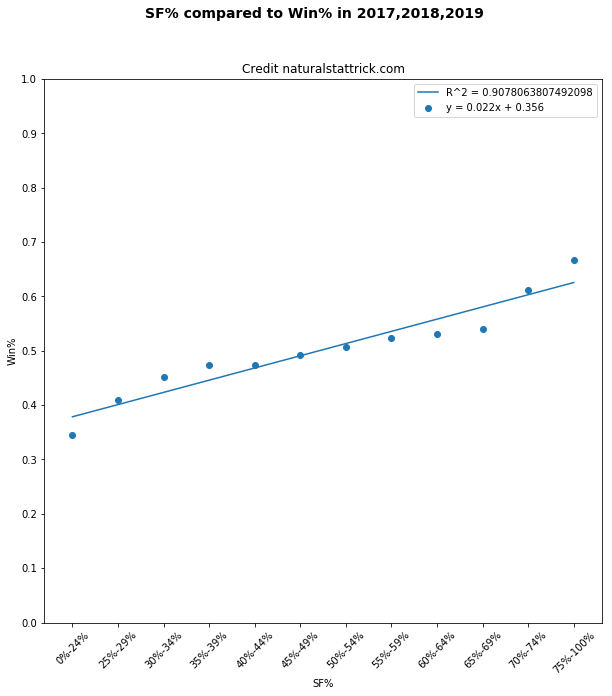


       index   2017   2018   2019  Average
0     0%-24% 20.00% 33.33% 50.00%   34.44%
1    25%-29% 43.75% 41.67% 37.50%   40.97%
2    30%-34% 56.00% 44.44% 35.06%   45.17%
3    35%-39% 48.45% 44.83% 48.80%   47.36%
4    40%-44% 44.02% 48.49% 49.88%   47.46%
5    45%-49% 48.86% 48.58% 50.00%   49.15%
6    50%-54% 50.83% 50.96% 50.45%   50.75%
7    55%-59% 56.30% 51.56% 49.00%   52.29%
8    60%-64% 51.60% 55.31% 52.06%   52.99%
9    65%-69% 43.42% 55.56% 62.82%   53.93%
10   70%-74% 62.50% 57.14% 64.00%   61.21%
11  75%-100% 66.67% 66.67% 66.67%   66.67%


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from scipy import stats

check = 'y'

data = []
years = []
stat = ''
statList = ['CF%','FF%','SF%','xGF%','SCF%','HDCF%','HDSF%','HDGF%','HDSH%','HDSV%','MDCF%','MDSF%','MDGF%','MDSH%','MDSV%','LDCF%','LDSF%','LDGF%','LDSH%','LDSV%','SH%','SV%','PDO']
while check == 'y':
    
    if stat is '':
        stat = input('Stat: (CF%,FF%,SF%,xGF%,SCF%)')
        
    year = input("Year: ") #2017,2018,2019
    years.append(year)
     
    situation ='5v5' #input("Situation: ") #5v5, all
    file = year + ' ' + stat + ' ' + situation + '.csv'
    
    exists = os.path.isfile(file)
    if exists:
        fTable = pd.read_csv(file,sep=',')    #Full csv import to table
        data.append(fTable)
    else:
        print('No data for that request')
    
    check = input("Add to dataset(y or n): ")

gTable = pd.DataFrame(index = ['0%-24%','25%-29%','30%-34%','35%-39%','40%-44%','45%-49%','50%-54%','55%-59%','60%-64%','65%-69%','70%-74%','75%-100%'], columns = years)

for i in range(len(data)):
    gTable[years[i]] = col = data[i]['Perc'].tolist()
    
gTable['Average'] = gTable.mean(axis=1)

gTable = gTable.reset_index()

x = np.array([1,2,3,4,5,6,7,8,9,10,11,12])
y = gTable['Average']
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
eqn = slope * x + intercept
eqnstr = 'y = '+ str(round(slope,3))+'x + '+str(round(intercept,3))
rsq = r_value**2

plt.plot(x,eqn,label = 'R^2 = '+str(rsq))
plt.scatter(x, y,label = eqnstr)
plt.xticks(rotation = 45)
plt.suptitle(stat+ ' compared to Win% in '+','.join(years),fontsize = 14,fontweight = 'bold')
plt.title('Credit naturalstattrick.com')
plt.xlabel(stat)
plt.ylabel('Win%')
plt.xticks(np.arange(1,13,1),gTable['index'])
plt.yticks(np.arange(0,1.1,.1))
plt.rcParams['figure.figsize'] = [10, 10]
plt.legend(loc = 'best')
plt.show()

print('')
print(gTable)




http://naturalstattrick.com/games.php?fromseason=20172018&thruseason=20182019&stype=2&sit=sva&loc=B&team=VGK&team2=All&rate=n
Table for VGK using xGF% from 20172018 to 20182019
                  Opp  Win & Over  Win & Under  Lose & Over  Lose & Under               STATUS
0     Avalanche (3-3)      50.00%        0.00%       16.67%        33.33%              Toss-Up
1    Blackhawks (6-0)      66.67%       33.33%        0.00%         0.00%             Dominate
2   BlueJackets (1-3)      25.00%        0.00%       25.00%        50.00%             Underdog
3         Blues (2-4)      16.67%       16.67%       33.33%        33.33%             Underdog
4        Bruins (1-3)      25.00%        0.00%       25.00%        50.00%             Underdog
5     Canadiens (1-3)       0.00%       25.00%       25.00%        50.00%             Underdog
6       Canucks (7-1)      87.50%        0.00%       12.50%         0.00%             Dominate
7      Capitals (3-1)      50.00%       25.00%       25.00%    

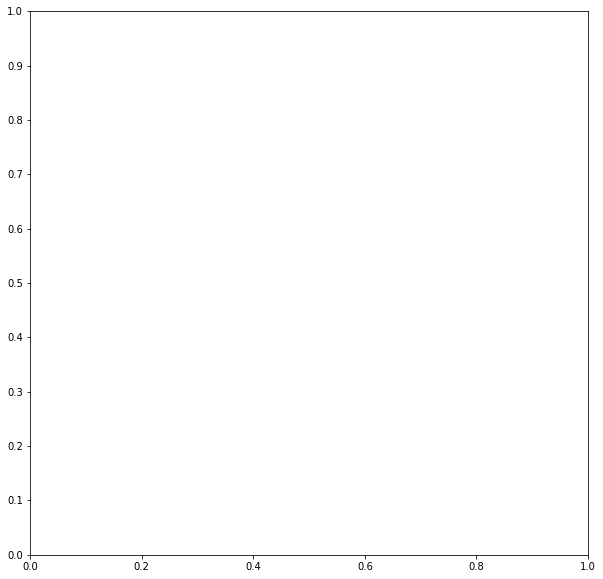

In [7]:
import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

statList = ['CF%','FF%','SF%','xGF%']
stat = 'xGF%'
yearStart = '20172018'
yearEnd = '20182019'
sit = 'sva' #all,5v5,pp,pk

teamCodes = ['ANA','ARI','BOS','BUF','CAR','CBJ','CGY','CHI','COL','DAL','DET','EDM','FLA','L.A','MIN','MTL','N.J','NSH','NYI','NYR','OTT','PHI','PIT','S.J','STL','T.B','TOR','VAN','VGK','WPG','WSH']
team = 'VGK' #input('Select a team: ')
url = 'http://naturalstattrick.com/games.php?fromseason='+yearStart+'&thruseason='+yearEnd+'&stype=2&sit=sva&loc=B&team='+team+'&team2=All&rate=n'
print(url)
html = requests.get(url).content
dfList = pd.read_html(html)
fTable = dfList[0]

def cleanGame(game):
    game = game[13:]
    game = game.replace(' ','')
    game = game.split(',')
    return game

def getOpp(game,team):
    if team in game[0]:
        return ''.join([i for i in game[1] if not i.isdigit()])
    else:
        return ''.join([i for i in game[0] if not i.isdigit()])

#Removes city from team name as to match with game section
def cleanTeam(team):
    team = team.rpartition(' ')[2]
    return team

#compare scores from the game section to determine the winner
def findWinner(game):
    score1 = ''.join([i for i in game[0] if i.isdigit()])
    score2 = ''.join([i for i in game[1] if i.isdigit()])
    if int(score1[-1:]) > int(score2[-1:]):
        return ''.join([i for i in game[0] if not i.isdigit()])
    else:
        return ''.join([i for i in game[1] if not i.isdigit()])
        
def checkWinner(game,team):
     return team in game  

#setup table 
sTable = fTable.loc[:,['Game','Team','TOI',stat]]
sTable['Game'] = sTable['Game'].apply(cleanGame)
sTable['Team'] = sTable['Team'].apply(cleanTeam)
sTable['Opp'] = np.vectorize(getOpp)(sTable['Game'],sTable['Team'])
sTable['Game'] = sTable['Game'].apply(findWinner)
sTable['Win'] = np.vectorize(checkWinner)(sTable['Game'],sTable['Team'])
sTable = sTable.sort_values(by=['Opp','TOI',stat],ascending = False)
sTable[stat] = sTable[stat]/100

#Group by opponent, merge and average by team
#size = list(map(str,sTable.groupby(['Opp']).size().tolist()))
record = sTable.groupby(['Opp','Win']).size().unstack(fill_value=0)

def makerecord(win,lose):
    return str(win)+'-'+str(lose)

record = np.vectorize(makerecord)(record[True],record[False])

gTable = sTable.groupby(['Opp']).mean().reset_index()
gTable['Opp'] = gTable['Opp'] + ' ('+record+')'

#graph and table 
#print(gTable)
#plt.rcParams['figure.figsize'] = [15, 20]
#plt.figure(figsize=(1,1))
#gTable.plot(kind='bar',x = 'Opp',y=['Win',stat])
#plt.suptitle('Win% against teams based on'+stat,fontsize = 14,fontweight = 'bold')
#plt.title('Credit naturalstattrick.com')
#plt.xlabel(stat)
#plt.ylabel('Win%')
#plt.yticks(np.arange(0,1.1,.1))
#plt.axhline(y=.5,linewidth=1, color='k',ls =':')
#plt.savefig(team+' '+stat+'.png')

#over/under
def overover(win,stat):
    return(win == True and stat > .5)
def overunder(win,stat):
    return(win == True and stat < .5)
def underover(win,stat):
    return(win == False and stat > .5)
def underunder(win,stat):
    return(win == False and stat < .5)

sTable['Win & Over'] = np.vectorize(overover)(sTable['Win'],sTable[stat])   
sTable['Win & Under'] = np.vectorize(overunder)(sTable['Win'],sTable[stat])
sTable['Lose & Over'] = np.vectorize(underover)(sTable['Win'],sTable[stat])
sTable['Lose & Under'] = np.vectorize(underunder)(sTable['Win'],sTable[stat])
sTable = sTable.groupby(['Opp']).mean().reset_index()
pd.options.display.float_format = '{:,.2%}'.format
wTable = sTable[['Opp','Win & Over','Win & Under','Lose & Over','Lose & Under']]

wTable['Opp'] = wTable['Opp'] + ' ('+record+')'


#wTable.plot(kind = 'bar',x='Opp')
plt.yticks(np.arange(0,1.1,.1))
print('Table for '+team+' using ' + stat + ' from '+yearStart+' to '+ yearEnd)

def percCheck(perc1,perc2,perc3,perc4):
    if perc1 > .50:
        return 'Dominate'
    
    
    elif perc2 >.50:
        return 'Lucky'   
    
    elif perc3 > .50:
        return 'Unlucky'
    
    elif perc4 > .50:
        return 'Struggling'
    
    elif perc1+perc2 > .6:
        return 'Favorite'
    
    elif perc1+perc2 > .5:
        return 'Slight Edge'
    
    elif perc3+perc4 > .6:
        return 'Underdog'
    
    elif perc3+perc4 > .5:
        return 'Slight Disadvantage'
    
    else:
        return 'Toss-Up'
    
wTable['STATUS'] = np.vectorize(percCheck)(sTable['Win & Over'],sTable['Win & Under'],sTable['Lose & Over'],sTable['Lose & Under'])
pd.set_option('display.expand_frame_repr', False)
print(wTable)#.sort_values(by=['Win & Over', 'Win & Under'],ascending = False))
wTable = wTable[['Opp','STATUS']]
print(wTable)
wTable.to_csv(team+ stat + ' status'+'.csv')
print('done')